Importing all the necassary libraries for the analysis

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,r2_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier
import joblib

In [31]:
dataset = pd.read_csv('realistic_medical_5000_noise_FINAL.csv')

print("Let's Visualize and preform EDA: \n")

print("Dataset Info: \n",)
dataset.info()


Let's Visualize and preform EDA: 

Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4770 non-null   int64  
 1   gender             4770 non-null   object 
 2   fever              4770 non-null   int64  
 3   cough              4770 non-null   int64  
 4   fatigue            4770 non-null   int64  
 5   headache           4770 non-null   int64  
 6   muscle_pain        4770 non-null   int64  
 7   nausea             4770 non-null   int64  
 8   vomiting           4770 non-null   int64  
 9   diarrhea           4770 non-null   int64  
 10  skin_rash          4770 non-null   int64  
 11  loss_smell         4770 non-null   int64  
 12  loss_taste         4770 non-null   int64  
 13  systolic_bp        4770 non-null   float64
 14  diastolic_bp       4770 non-null   float64
 15  heart_rate         47

In [32]:
print("Dataset Description: \n",dataset.describe())

Dataset Description: 
               age        fever        cough      fatigue     headache  \
count  4770.00000  4770.000000  4770.000000  4770.000000  4770.000000   
mean     45.10608     1.771488     0.985744     1.641509     1.492872   
std      25.71225     1.136050     1.068726     1.160525     1.160279   
min       1.00000     0.000000     0.000000     0.000000     0.000000   
25%      23.00000     1.000000     0.000000     1.000000     0.000000   
50%      45.00000     2.000000     1.000000     2.000000     2.000000   
75%      67.00000     3.000000     2.000000     3.000000     3.000000   
max      89.00000     3.000000     3.000000     3.000000     3.000000   

       muscle_pain       nausea     vomiting     diarrhea    skin_rash  ...  \
count  4770.000000  4770.000000  4770.000000  4770.000000  4770.000000  ...   
mean      1.193920     0.510273     0.513208     0.537317     0.159748  ...   
std       1.126291     0.766788     0.768927     0.778978     0.488121  ...   
min

In [33]:
print("Few Elements of the Data: \n")
dataset.head()

Few Elements of the Data: 



,age,gender,fever,cough,fatigue,headache,muscle_pain,nausea,vomiting,diarrhea,...,diastolic_bp,heart_rate,temperature_c,oxygen_saturation,wbc_count,hemoglobin,platelet_count,crp_level,glucose_level,diagnosis
0,39,Male,3,1,3,0,3,2,0,0,...,73.8,72.2,36.7,96.1,9.19,15.78,206.5,8.48,99.6,COVID-19
1,79,Female,1,0,2,1,0,0,1,0,...,84.0,57.6,36.3,96.5,8.15,13.40,144.9,6.31,115.5,Pneumonia
2,82,Male,2,2,2,2,3,0,0,0,...,75.0,78.9,36.9,98.5,8.79,14.48,145.3,2.68,72.6,COVID-19
3,38,Male,3,0,2,1,1,2,2,0,...,74.6,61.2,36.2,99.2,3.93,13.23,209.0,2.37,106.3,Malaria
4,67,Male,3,0,3,3,0,0,2,1,...,69.9,76.6,36.4,97.3,5.76,13.59,216.8,8.27,93.2,Malaria


In [34]:
#Performing EDA 
dataset.isnull().sum()

age                  0
gender               0
fever                0
cough                0
fatigue              0
headache             0
muscle_pain          0
nausea               0
vomiting             0
diarrhea             0
skin_rash            0
loss_smell           0
loss_taste           0
systolic_bp          0
diastolic_bp         0
heart_rate           0
temperature_c        0
oxygen_saturation    0
wbc_count            0
hemoglobin           0
platelet_count       0
crp_level            0
glucose_level        0
diagnosis            0
dtype: int64

In [35]:
le = LabelEncoder()
dataset['diagnosis'] = le.fit_transform(dataset['diagnosis'])

X = dataset.drop('diagnosis',axis=1)
y = dataset['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3816, 23)
Test shape: (954, 23)


In [36]:
#label encoder pkl file 
joblib.dump(le,'label_encoder.pkl')

['label_encoder.pkl']

Visualizing a countplot: 


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

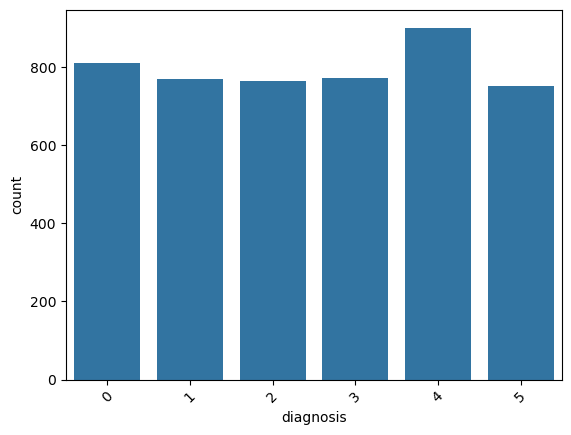

In [37]:
#plotting a countplot 
print("Visualizing a countplot: ")
sns.countplot(data=dataset,x='diagnosis')
plt.xticks(rotation =45)

Exploring Feature Distribution: 


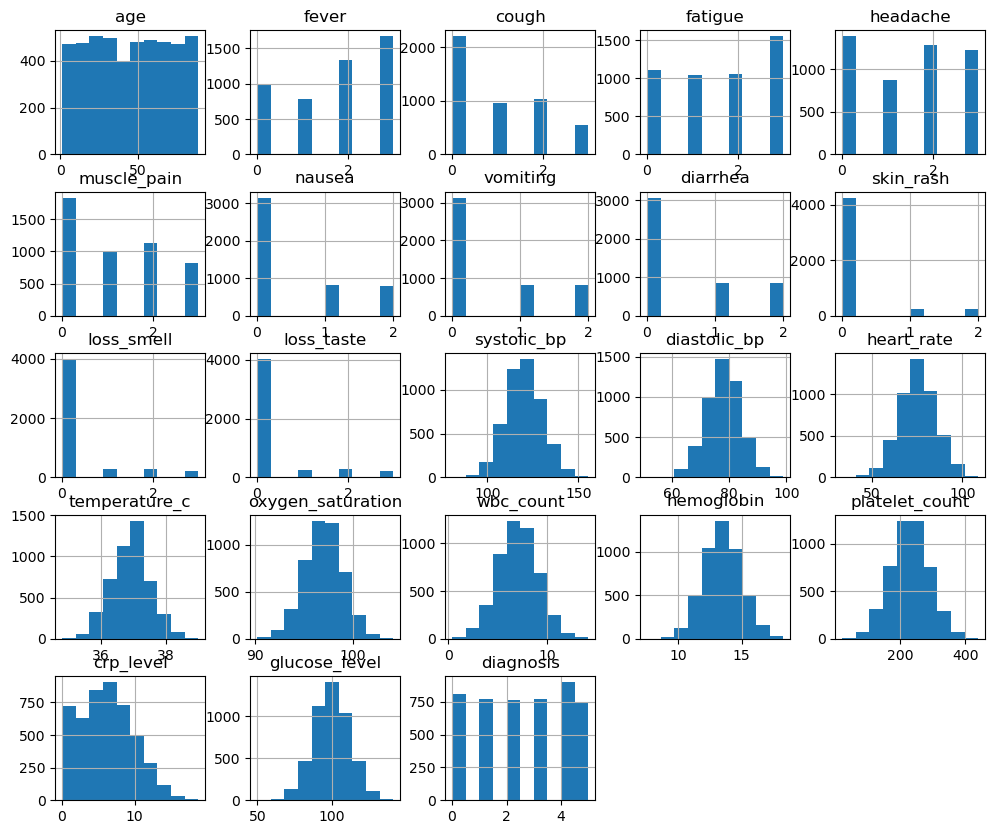

In [38]:
print("Exploring Feature Distribution: ")
numerical = dataset.select_dtypes(include=['int64','float64']).columns
dataset[numerical].hist(figsize=(12,10))
plt.show()

Visualizing a correlation map


<Axes: >

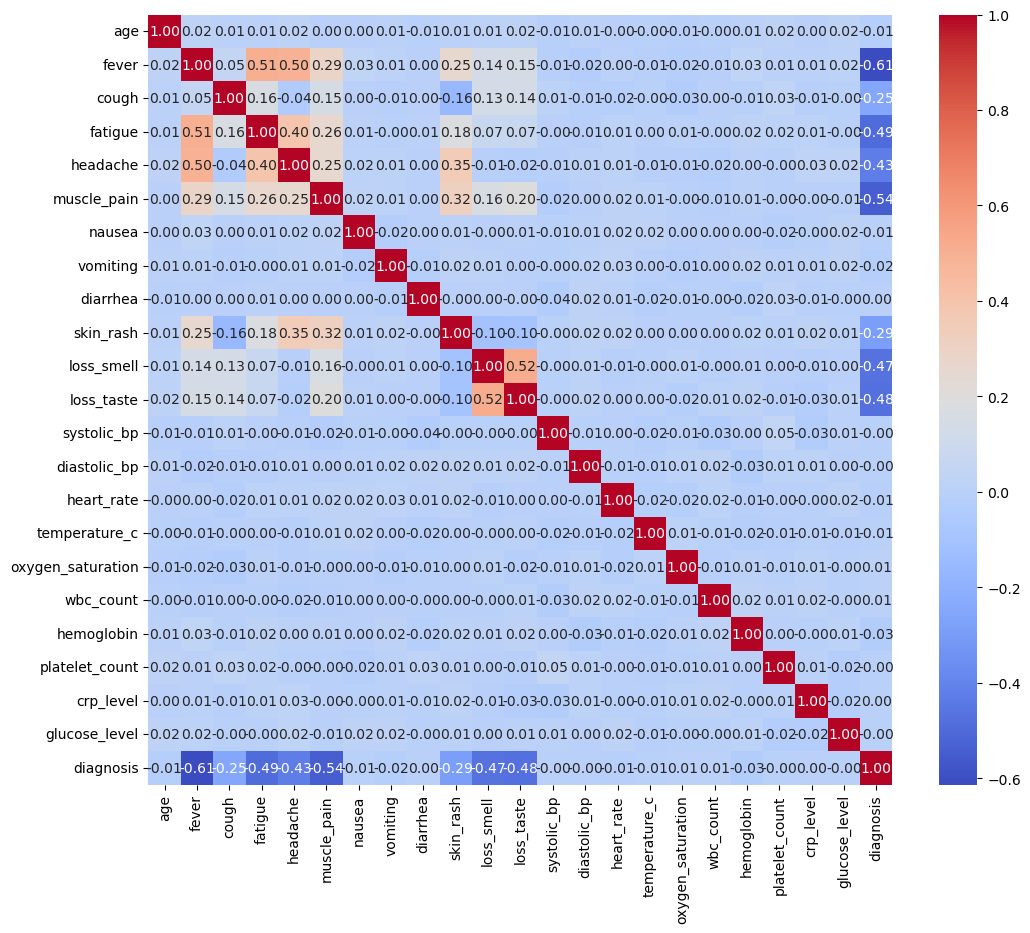

In [39]:
print("Visualizing a correlation map")
plt.figure(figsize=(12,10))
sns.heatmap(dataset[numerical].corr(),annot=True,cmap='coolwarm',fmt='.2f')

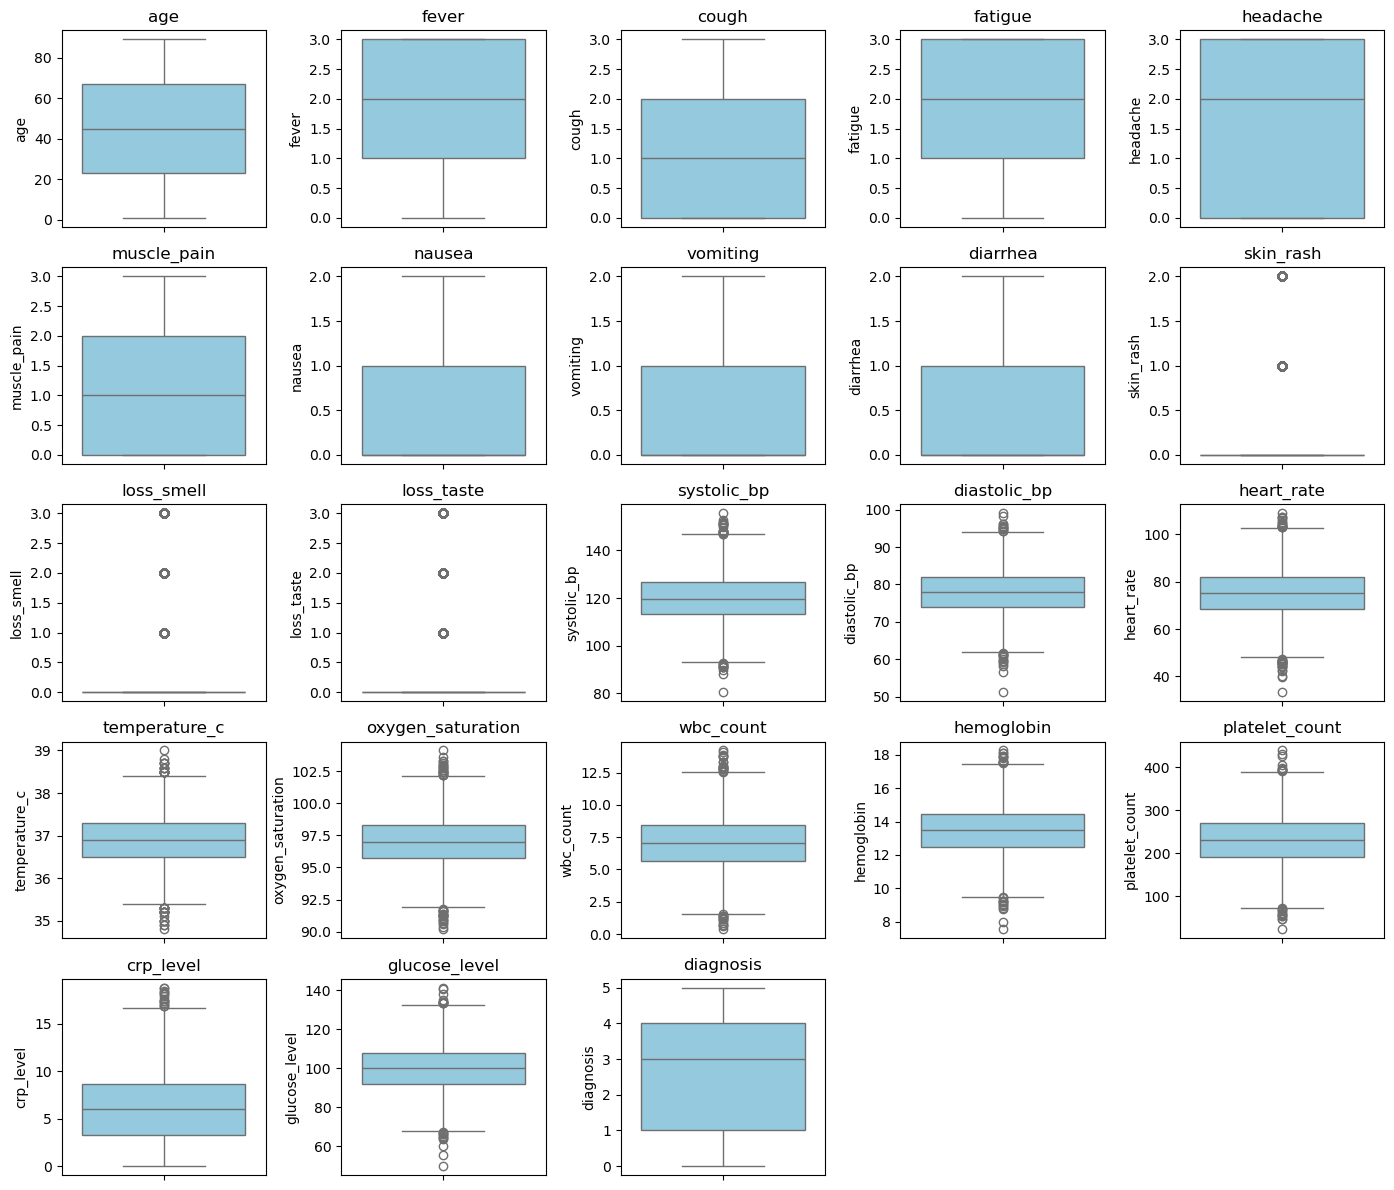

In [40]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=dataset[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


In [41]:
#Feature Engineering (feature extraction , feature selection using methods like filter )
symptom_cols = [col for col in X.columns if X[col].dtype == 'int64' and X[col].max() <= 3]
X['symptom_count'] = X[symptom_cols].sum(axis=1)


In [42]:
#Mean Arterial Pressure (MAP)
X['map'] = (X['systolic_bp'] + 2 * X['diastolic_bp']) / 3
#Pulse Pressure
X['pulse_pressure'] = X['systolic_bp'] - X['diastolic_bp']
#Fever severity:
X['fever_intensity'] = X['temperature_c'] - 37.0
#Hypoxia indicator:
X['low_o2_flag'] = (X['oxygen_saturation'] < 94).astype(int)
#Tachycardia indicator:
X['high_hr_flag'] = (X['heart_rate'] > 100).astype(int)
#Blood panel
X['inflammation_score'] = X['wbc_count'] * X['crp_level']
X['anemia_risk'] = (X['hemoglobin'] < 12).astype(int)

print("New Features are engineered and created successfully!")

New Features are engineered and created successfully!


In [43]:
categorical_feature = ['gender']
numeric_feature = [col for col in X_train.columns if col not in categorical_feature]

preprocess = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_feature),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feature)
    ]
)

# Feature selection
feature_selector = SelectKBest(score_func=chi2, k=15)

print("Preprocessing pipeline created!")
print("Numeric columns:", len(numeric_feature))
print("Categorical columns:", categorical_feature)
print("Best features are selected using SelectKBest and Chi^2 technique")

Preprocessing pipeline created!
Numeric columns: 22
Categorical columns: ['gender']
Best features are selected using SelectKBest and Chi^2 technique


In [44]:
#since we have 22 feature columns and all the features looks important we proceed with PCA it gives us the strongest combined factors 
pca = PCA(n_components=10)
print("PCA is created and rady with 10 components!")

PCA is created and rady with 10 components!


In [45]:
#Now we are going to build a full pipeline for the prediction of diagnosis using random forest classifier 
model = RandomForestClassifier(n_estimators=200,max_depth=None,random_state=42)

pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('chi2',feature_selector),
    ('pca',pca),
    ('model',model)
])

print("Full Pipeline is created successfuly!")
pipe

Full Pipeline is created successfuly!


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'fever', 'cough',
                                                   'fatigue', 'headache',
                                                   'muscle_pain', 'nausea',
                                                   'vomiting', 'diarrhea',
                                                   'skin_rash', 'loss_smell',
                                                   'loss_taste', 'systolic_bp',
                                                   'diastolic_bp', 'heart_rate',
                                                   'temperature_c',
                                                   'oxygen_saturation',
                                                   'wbc_count', 'hemoglobin',
                                                   'platelet_count',
                                                   'crp_level',
                                                   'glucose_level']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender'])])),
                ('chi2',
                 SelectKBest(k=15,
                             score_func=<function chi2 at 0x0000014AD6ABE5C0>)),
                ('pca', PCA(n_components=10)),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [46]:
#Training the pipeline and evaluation 
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score",accuracy)

print("\nClassification Report :\n")
print(classification_report(y_test,y_pred))


Accuracy Score 0.7253668763102725

Classification Report :

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       152
           1       0.81      0.82      0.81       154
           2       0.76      0.82      0.79       163
           3       0.75      0.77      0.76       146
           4       0.62      0.58      0.60       197
           5       0.54      0.54      0.54       142

    accuracy                           0.73       954
   macro avg       0.73      0.73      0.73       954
weighted avg       0.72      0.73      0.72       954



In [47]:
#random forest pkl file 
joblib.dump(pipe,'randomForest_model.pkl')

['randomForest_model.pkl']

In [48]:
#lets try hyperparameter tuning 
rf_tune = RandomForestClassifier(random_state=42)

param_grid = {
    'model__n_estimators': [100,200,300],
    'model__max_depth': [None,10,20,30],
    'model__min_samples_split': [2,5,10],
    'model__min_samples_leaf': [1,2,4]
}

grid = GridSearchCV(estimator=pipe,param_grid=param_grid,cv=3,scoring='accuracy',n_jobs=-1,verbose=1)

grid.fit(X_train,y_train)

print("\nBest Params:", grid.best_params_)
print("Best Training Accuracy:", grid.best_score_)

best_pipeline = grid.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Params: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Best Training Accuracy: 0.7015199161425576


In [49]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

pipeline_xgb = Pipeline(steps=[
    ('preprocess',preprocess),
    ('model',xgb_model)
])

print("XGBoost Pipeline created!")

XGBoost Pipeline created!


In [50]:
pipeline_xgb.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'fever', 'cough',
                                                   'fatigue', 'headache',
                                                   'muscle_pain', 'nausea',
                                                   'vomiting', 'diarrhea',
                                                   'skin_rash', 'loss_smell',
                                                   'loss_taste', 'systolic_bp',
                                                   'diastolic_bp', 'heart_rate',
                                                   'temperature_c',
                                                   'oxygen_saturation',
                                                   'wbc_count', 'hemoglobin',
                                                   'platelet_count',
                                                   'crp_level',
                                                   'glucos...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [51]:
y_pred = pipeline_xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {acc:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.7379

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       152
           1       0.90      0.80      0.85       154
           2       0.78      0.85      0.81       163
           3       0.75      0.87      0.81       146
           4       0.63      0.54      0.58       197
           5       0.49      0.51      0.50       142

    accuracy                           0.74       954
   macro avg       0.74      0.74      0.74       954
weighted avg       0.74      0.74      0.74       954



In [52]:
#XGboost model pkl file 
joblib.dump(pipeline_xgb,'XGB_model_pipeline.pkl')

['XGB_model_pipeline.pkl']

In [53]:

pipeline = Pipeline([
    ('preprocess',preprocess),
    ('model', XGBClassifier(
        objective='multi:softprob',
        num_class=6,
        eval_metric='mlogloss',
        random_state=42
    ))
])

param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [3,5,7],
    "model__learning_rate": [0.03,0.05],
    "model__subsample": [0.8,0.9],
    "model__colsample_bytree": [0.8,0.9],
    "model__gamma": [1,5],
    "model__reg_alpha": [0.5,0.7],
    "model__reg_lambda": [1, 2]
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best Params: {'model__colsample_bytree': 0.9, 'model__gamma': 5, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__reg_alpha': 0.5, 'model__reg_lambda': 2, 'model__subsample': 0.9}
Best Accuracy: 0.7473794549266248
